In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib widget

In [2]:
def position_points(array):
    fig, ax = plt.subplots()
    ax.scatter(array[:,:-1], array[:,1:], alpha=.7, color='black', s = 80)
    ax.axis('equal')
    plt.show()

In [3]:
def len_draw(r1, r2, width):
    
    r2 = -r2
    # equation 1
    
    if r1 <= r2:
        # len 1
        x1   = np.linspace(-(r1),0, 500)
        eq1  = np.sqrt( (r1 ** 2) - (x1 ** 2) )
        
        # len 2
        h2   = -np.sqrt( (r2 ** 2) - (r1 ** 2))
        x2   = np.linspace(0,r2+h2, 500)
        eq2  = np.sqrt( (r2 ** 2) - ( (x2 - h2) ** 2) )
    else:
        # len 1
        h1   = np.sqrt( (r1 ** 2) - (r2 ** 2))
        x1   = np.linspace(-r1+h1,0, 500)
        eq1  = np.sqrt( (r1 ** 2) - ( (x1 - h1) ** 2) )
        
        # len 2
        x2   = np.linspace(0,r2, 500)
        eq2  = np.sqrt( (r2 ** 2) - (x2 ** 2) )
        
    # simetric equation 1
    eq12 = np.concatenate(( np.flip(eq1), -eq1 ))
    x12  = np.concatenate(( np.flip(x1), x1 ))
    
    # simetric equation 2
    eq21 = np.concatenate(( np.flip(eq2), -eq2 ))
    x21  = np.concatenate(( np.flip(x2), x2 ))
    
    # draw
    fig, ax = plt.subplots()
    ax.axis('equal')
    ax.fill(x12, eq12,facecolor= '#5072A7', alpha = 0.5, label = 'R1')
    ax.fill(x21, eq21,facecolor= '#CD5C5C', alpha = 0.5, label = 'R2')
    ax.legend()
    plt.show()

In [4]:
def matrix_points(p):
    #x son los puntos sobre el eje x
    x = list(np.array(p)[:,0])
    y = list(np.array(p)[:,1])
    
    #subm_1 es la submatriz compuesta de vectores fila de x
    subm_1x = np.array(x*len(x)).reshape(len(x),len(x))
    subm_1y = np.array(y*len(y)).reshape(len(y),len(y))
    
    #subm_2 es la submatriz compuesta de vectores columna repitiendo x
    subm_2x = np.transpose(subm_1x)
    subm_2y = np.transpose(subm_1y)
    
    #xi_a es el promedio de cada punto en x con cada uno de los demas puntos
    xi_a = (subm_1x+subm_2x)/2
    eta_a = (subm_1y+subm_2y)/2
    
    #xi_d es la distancia de cada punto con cada uno de los demas puntos
    xi_d = subm_2x-subm_1x
    eta_d = subm_2y-subm_1y
    
    #vectores de las matrices xi_a y xi_d
    xi_av = list(xi_a.reshape(1,len(xi_a)**2))
    xi_dv = list(xi_d.reshape(1,len(xi_d)**2))
    eta_av = list(eta_a.reshape(1,len(eta_a)**2))
    eta_dv = list(eta_d.reshape(1,len(eta_d)**2))
    
    #matriz con todas las parejas de puntos xi_a y xi_d
    xi_m = np.transpose(np.array(xi_av+xi_dv+eta_av+eta_dv)).reshape(len(x),len(x),4)
    return xi_m

In [5]:
def foco_0(xi_a, xi_d, eta_a, eta_d, za, wa, R1, R2):
    #constantes
    k = ((2*np.pi)/wa)
    n = 1.5 #refractive index
    
    xi_p, xi_n = xi_a+(xi_d)/2, xi_a-(xi_d)/2
    eta_p, eta_n = eta_a+(eta_d)/2, eta_a-(eta_d)/2
    
    normPlus  = (xi_p**2) + (eta_p**2)
    normMinus = (xi_n**2) + (eta_n**2)
    
    # fase dentro y fuera de la lente para +
    if (normPlus > (R1 ** 2)) or (normPlus > (R2 ** 2)):
        phase_plus = 0
    else:
        phase_plus  = R1 * np.sqrt(1 - (normPlus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normPlus / (R2 ** 2)) + 0j)
        
    # fase dentro y fuera de la lente para -
    if (normMinus > (R1 ** 2)) or (normMinus > (R2 ** 2)):
        phase_minus = 0
    else:
        phase_minus = R1 * np.sqrt(1 - (normMinus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normMinus / (R2 ** 2)) + 0j)
    
    phase = np.exp(1j*(n-1)*k*phase_plus) * np.exp(-1j*(n-1)*k*phase_minus)
    
    #distancia s
    s_1 = np.sqrt((xi_p ** 2) + (eta_p **2) + (za ** 2))
    s_2 = np.sqrt((xi_n **2) + (eta_n ** 2) + (za ** 2))
    
    #desarrollo
    phase_t = np.exp(1j*k*s_1-1j*k*s_2) * phase
    
    phase_realT = np.real(phase_t)
    
    #print(phase)
    return phase_realT


def sum_focus(za, p, wa,R1,R2):
    sum_v = 0
    matrix_complete = matrix_points(p)
    matrix_virtual = []
    
    for i in range(0,len(matrix_complete)):
        for j in range(0,len(matrix_complete)):
            if i != j:
                matrix_virtual.append(list(matrix_complete[i,j]))
    
    matrix_virtual = np.array(matrix_virtual)
    
    for k in matrix_virtual:
#         sum_v = sum_v + GeometricPotencial_3D_00_reducido(xa,k[0],k[1],ya,k[2],k[3],za,wa,c,R1,R2)
        sum_v = sum_v + foco_0(k[0],k[1],k[2],k[3],za,wa,R1,R2)
    return sum_v

In [6]:
def rho(point, z, R1, R2, wa):
    k         = ((2*np.pi)/wa)
    n = 1.5
    
    #point
    point_x = point[0]
    point_y = point[1]
    
    pointxy = (point_x ** 2) + (point_y ** 2)
    
    #phase interferencia
    phase_int = k * np.sqrt((pointxy) + (z ** 2))
    
    #phase lente
    phase_len = k * (n-1)*(R1 * np.sqrt(1- (pointxy/(R1**2)))  -  R2 * np.sqrt(1- (pointxy/(R2**2))))
    
    #equation
    rho_eq = phase_int + phase_len
    
    return rho_eq

posición aproximada del foco:  1.363636363636364e-06 ||| a maximo:  1.7677669529663689


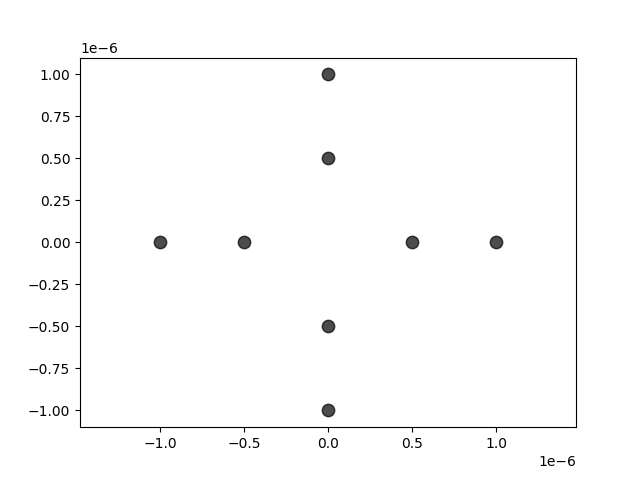

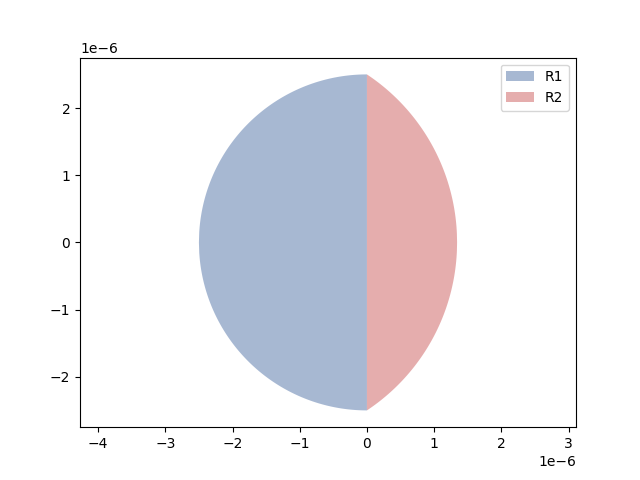

(None, 2.5000000000000006e-06)

In [7]:
w      = 500 * (10 ** -9)
r1     = 5*w
r2     = -6*w
a      = .1 * w
#points = np.array([[a,0],[-a,a],[-a/2,-a]])
# points = np.array([[2*a,0],[-2*a,0],[0,2*a],[0,-2*a],[3*a,0],[-3*a,0],[0,3*a],[0,-3*a],[a,0],[-a,0],[0,a],[0,-a],[4*a,0],[-4*a,0],[0,4*a],[0,-4*a],[5*a,0],[-5*a,0],[0,5*a],[0,-5*a]])
# points = np.array([[3.2*a,0],[-3.2*a,0],[0,3.2*a],[0,-3.2*a],[3.7*a,0],[-3.7*a,0],[0,3.7*a],[0,-3.7*a],[3.5*a,0],[-3.5*a,0],[0,3.5*a],[0,-3.5*a],[3*a,0],[-3*a,0],[0,3*a],[0,-3*a],[4*a,0],[-4*a,0],[0,4*a],[0,-4*a]])
points = np.array([[2*a,0],[-2*a,0],[0,2*a],[0,-2*a],[a,0],[-a,0],[0,a],[0,-a]])

paraxial_aprox = (((1/r1) - (1/r2))) ** -1
print('posición aproximada del foco: ', paraxial_aprox, '||| a maximo: ',np.sqrt(25/8))

position_points(points*10)
len_draw(r1,r2,0), r1

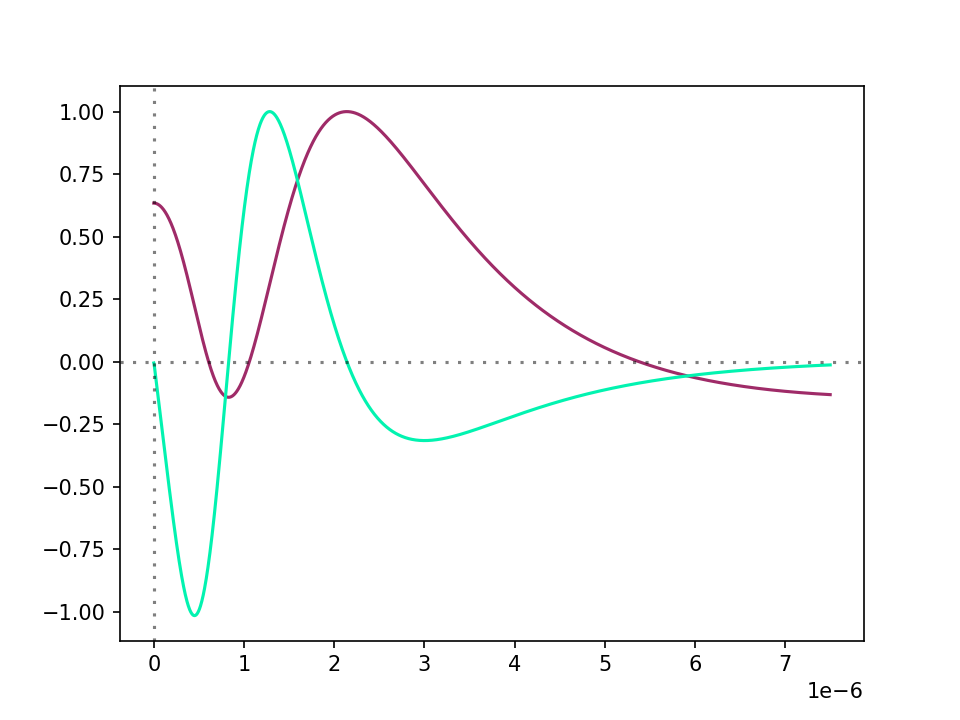

CPU times: user 177 ms, sys: 292 ms, total: 469 ms
Wall time: 162 ms


In [8]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)

z_plot_1 = np.array(list(sum_focus(zzz, points*15, w,r1,r2)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)

dz = np.gradient(z_plot_1, zzz)

dz = dz/np.max(dz)

ifft = np.fft.fft(z_plot_1)

fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")
ax.plot(zzz, dz, color="#02F3B0")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([0*w, .5*w])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

# Prueba 8 puntos:

In [9]:
points_2 = points*15

# posición de los puntos
x0 = points_2[0]
x1 = points_2[1]
x2 = points_2[2]
x3 = points_2[3]
x4 = points_2[4]
x5 = points_2[5]
x6 = points_2[6]
x7 = points_2[7]

# definición de k
k = ((2*np.pi)/w)

# indice de refracción
n = 1.5
points_2, x4, x0

(array([[ 1.5e-06,  0.0e+00],
        [-1.5e-06,  0.0e+00],
        [ 0.0e+00,  1.5e-06],
        [ 0.0e+00, -1.5e-06],
        [ 7.5e-07,  0.0e+00],
        [-7.5e-07,  0.0e+00],
        [ 0.0e+00,  7.5e-07],
        [ 0.0e+00, -7.5e-07]]),
 array([7.5e-07, 0.0e+00]),
 array([1.5e-06, 0.0e+00]))

In [10]:
# sin x1
def sinx1(z):
    norm0 = (x0[0]**2) + (x0[1]**2)
    norm1 = (x1[0]**2) + (x1[1]**2)
    sinx = np.sin(rho(x0, z, r1, r2, w) - rho(x1, z, r1, r2, w))
    return sinx

In [11]:
def sinx1p(z):
    sinx = np.sin(rho(x0, z, r1, r2, w) - rho(x4, z, r1, r2, w))
    return sinx

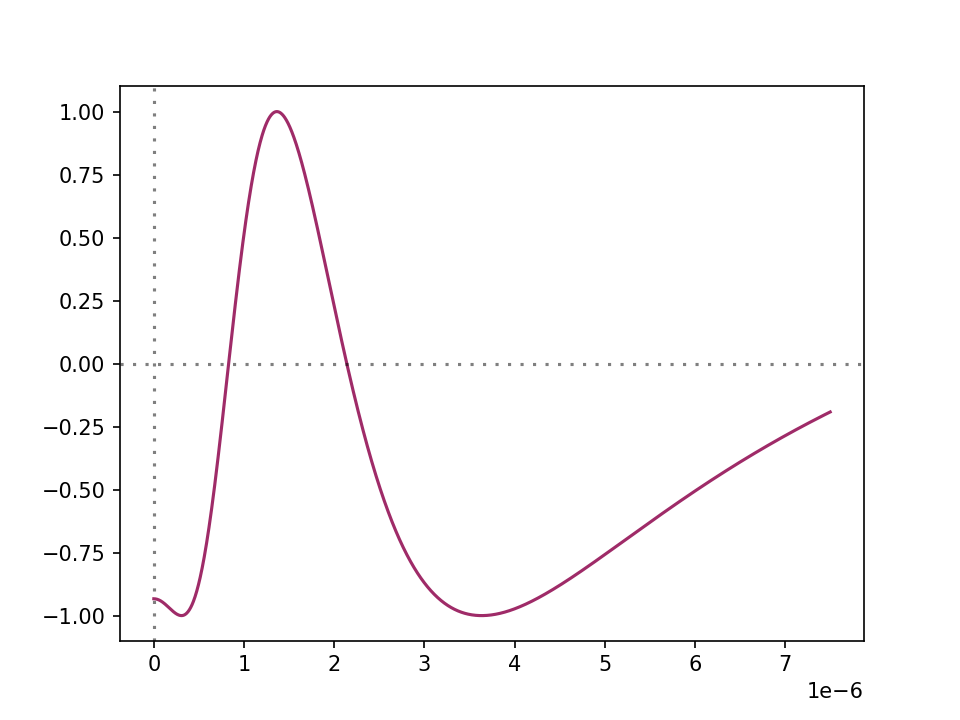

CPU times: user 147 ms, sys: 187 ms, total: 334 ms
Wall time: 126 ms


In [12]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)

z_plot_1 = np.array(list(sinx1p(zzz)), dtype=float)

#z_plot_1 = z_plot_1/np.max(z_plot_1)


fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([0*w, .5*w])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

# 12 puntos

posición aproximada del foco:  1.2500000000000003e-06 ||| a maximo:  1.7677669529663689


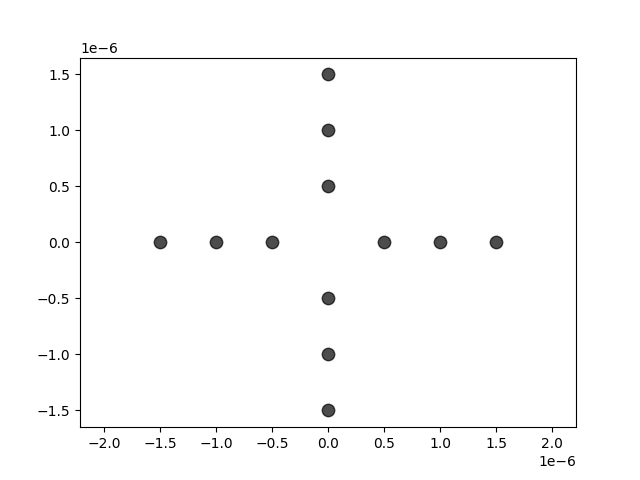

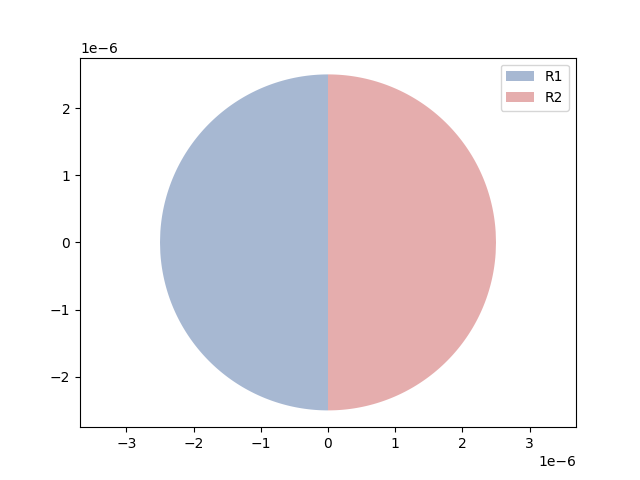

(None, 2.5000000000000006e-06)

In [13]:
w      = 500 * (10 ** -9)
r1     = 5*w
r2     = -5*w
a      = .1 * w
points = np.array([[a,0],[-a,0],[0,a],[0,-a],[2*a,0],[-2*a,0],[0,2*a],[0,-2*a],[3*a,0],[-3*a,0],[0,3*a],[0,-3*a]])

paraxial_aprox = (((1/r1) - (1/r2))) ** -1
print('posición aproximada del foco: ', paraxial_aprox, '||| a maximo: ',np.sqrt(25/8))

position_points(points*10)
len_draw(r1,r2,0), r1

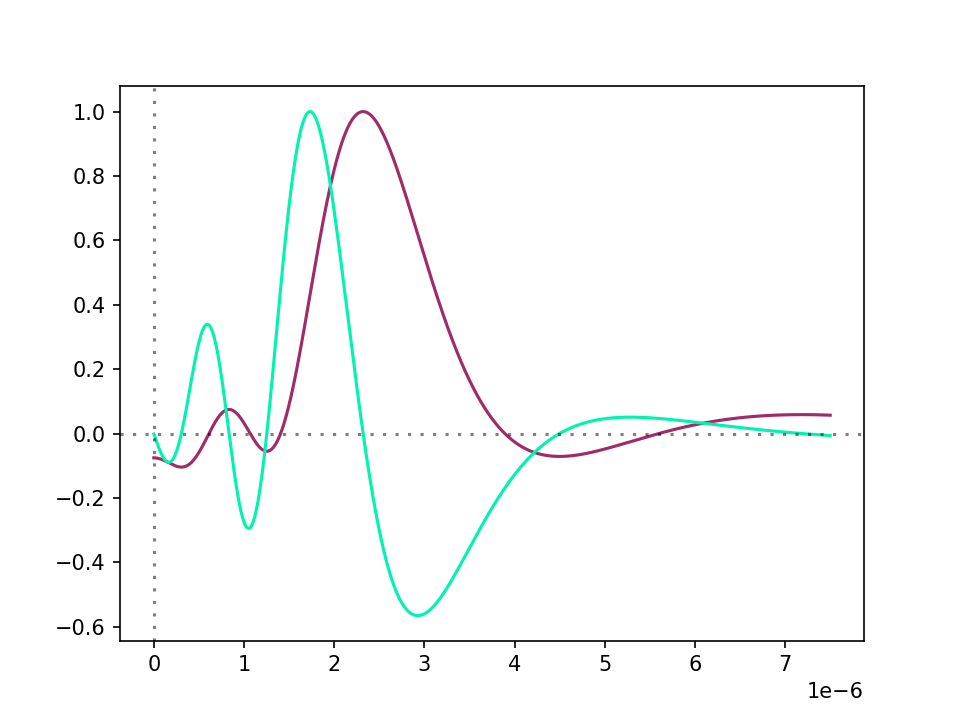

CPU times: user 172 ms, sys: 302 ms, total: 474 ms
Wall time: 165 ms


In [14]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)

z_plot_1 = np.array(list(sum_focus(zzz, points*15, w,r1,r2)), dtype=float)
# z_plot_2 = np.array(list(sum_focus(zzz, points*10, w,r1,r2)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)
# z_plot_2 = z_plot_2/np.max(z_plot_2)

dz = np.gradient(z_plot_1, zzz)

dz = dz/np.max(dz)

ifft = np.fft.fft(z_plot_1)

fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")
ax.plot(zzz, dz, color="#02F3B0")
# ax.plot(zzz, z_plot_2, color="#902B68")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([0*w, .5*w])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

In [15]:
# puntos individuales
points_2 = points*15

# posición de los puntos
x0 = points_2[0]
x1 = points_2[4]
x2 = points_2[8]

# definición de k
k = ((2*np.pi)/w)

# indice de refracción
n = 1.5
x0, x1, x2, points_2

(array([7.5e-07, 0.0e+00]),
 array([1.5e-06, 0.0e+00]),
 array([2.25e-06, 0.00e+00]),
 array([[ 7.50e-07,  0.00e+00],
        [-7.50e-07,  0.00e+00],
        [ 0.00e+00,  7.50e-07],
        [ 0.00e+00, -7.50e-07],
        [ 1.50e-06,  0.00e+00],
        [-1.50e-06,  0.00e+00],
        [ 0.00e+00,  1.50e-06],
        [ 0.00e+00, -1.50e-06],
        [ 2.25e-06,  0.00e+00],
        [-2.25e-06,  0.00e+00],
        [ 0.00e+00,  2.25e-06],
        [ 0.00e+00, -2.25e-06]]))

In [16]:
def sinx1(z):
    sinx = np.sin(rho(x1, z, r1, r2, w) - rho(x0, z, r1, r2, w))

    return sinx

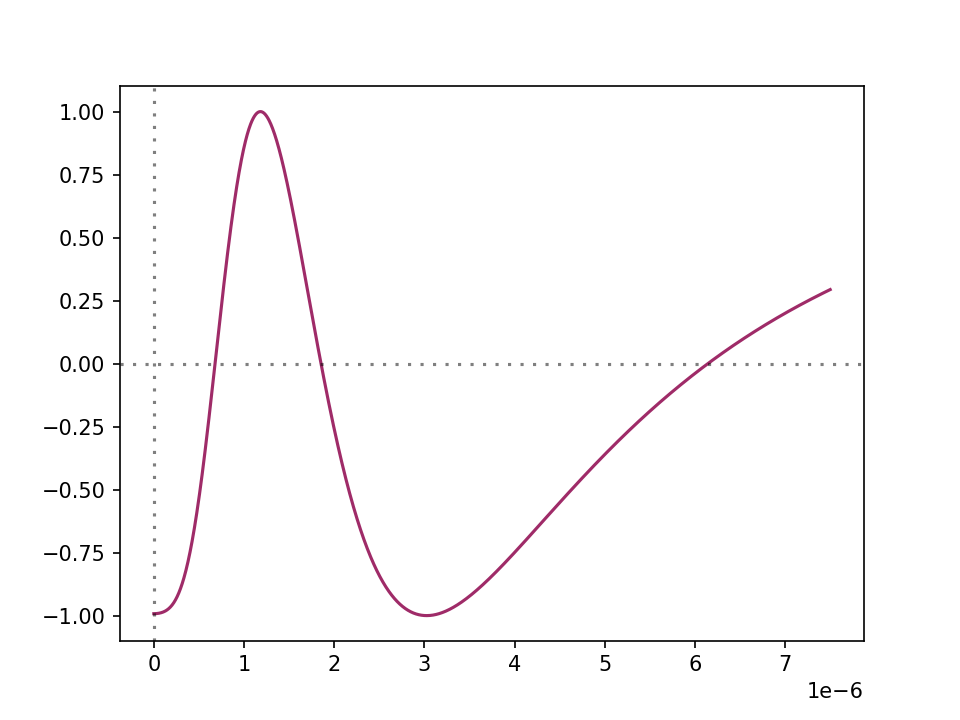

CPU times: user 140 ms, sys: 194 ms, total: 334 ms
Wall time: 125 ms


In [17]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)

z_plot_1 = np.array(list(sinx1(zzz)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)


fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([0*w, .5*w])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

In [18]:
def sinx1p(z):
    sinx = np.sin(rho(x2, z, r1, r2, w) - rho(x0, z, r1, r2, w))

    return sinx

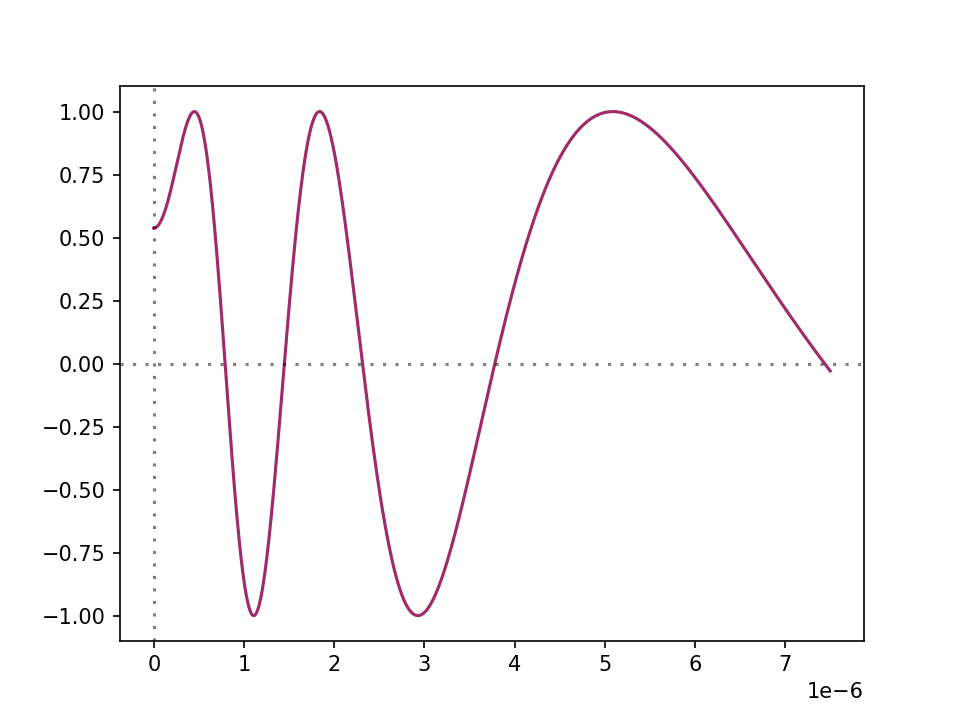

CPU times: user 150 ms, sys: 199 ms, total: 349 ms
Wall time: 131 ms


In [19]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)

z_plot_1 = np.array(list(sinx1p(zzz)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)


fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([0*w, .5*w])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

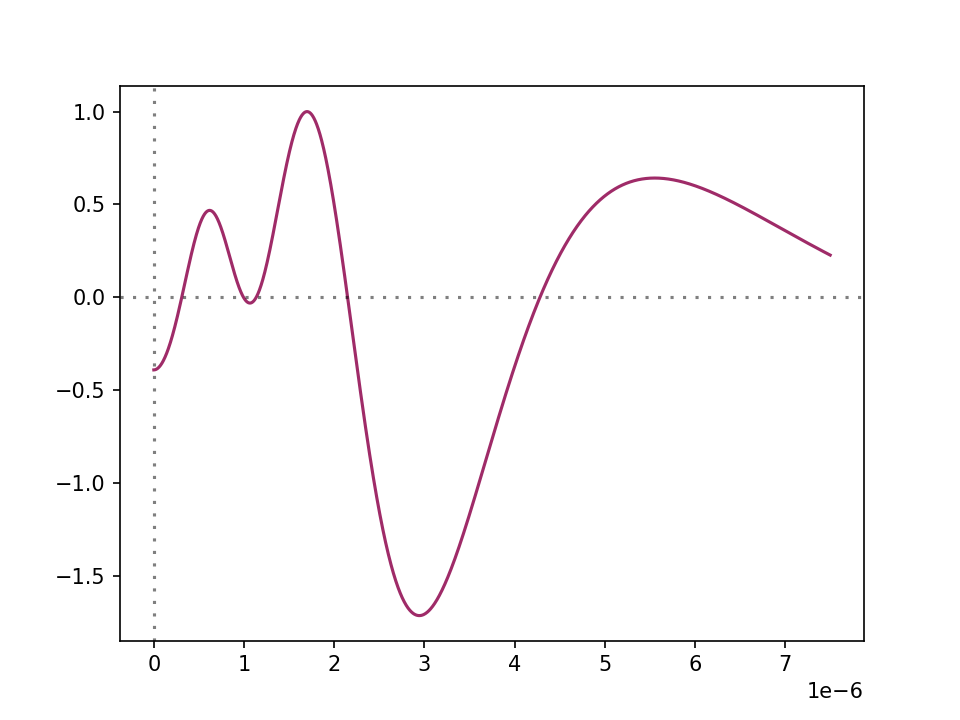

CPU times: user 209 ms, sys: 229 ms, total: 439 ms
Wall time: 190 ms


In [20]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)

z_plot_1 = np.array(list(sinx1(zzz) + sinx1p(zzz)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)


fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([0*w, .5*w])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

In [21]:
def sinx1pp(z):
    sinx = np.sin(rho(x2, z, r1, r2, w) - rho(x1, z, r1, r2, w))
    return sinx

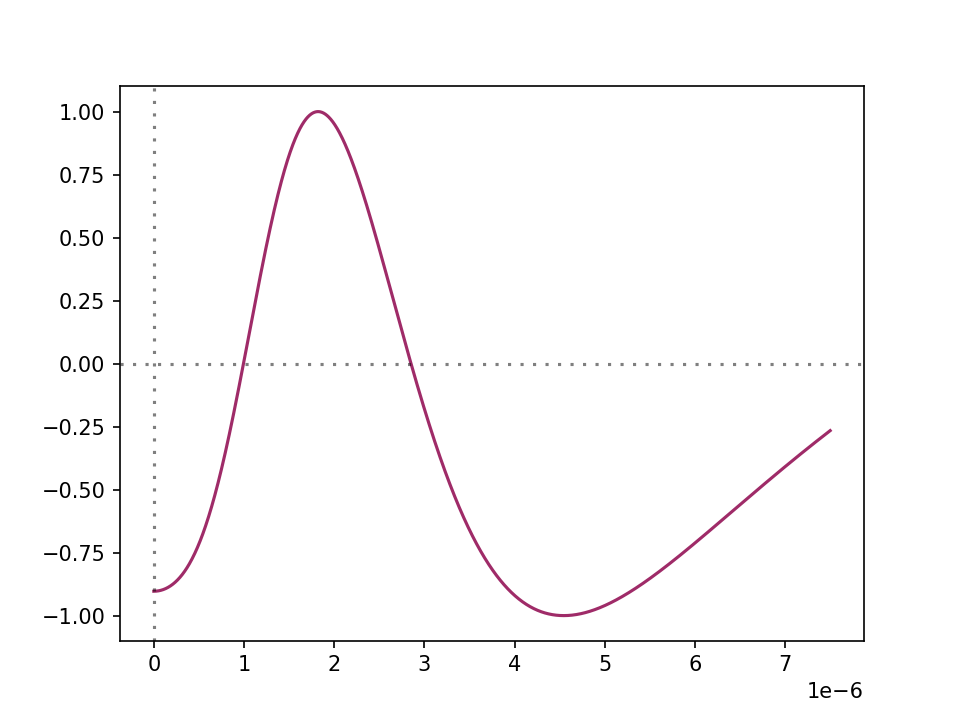

CPU times: user 151 ms, sys: 199 ms, total: 350 ms
Wall time: 137 ms


In [22]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)

z_plot_1 = np.array(list(sinx1pp(zzz)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)


fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([0*w, .5*w])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

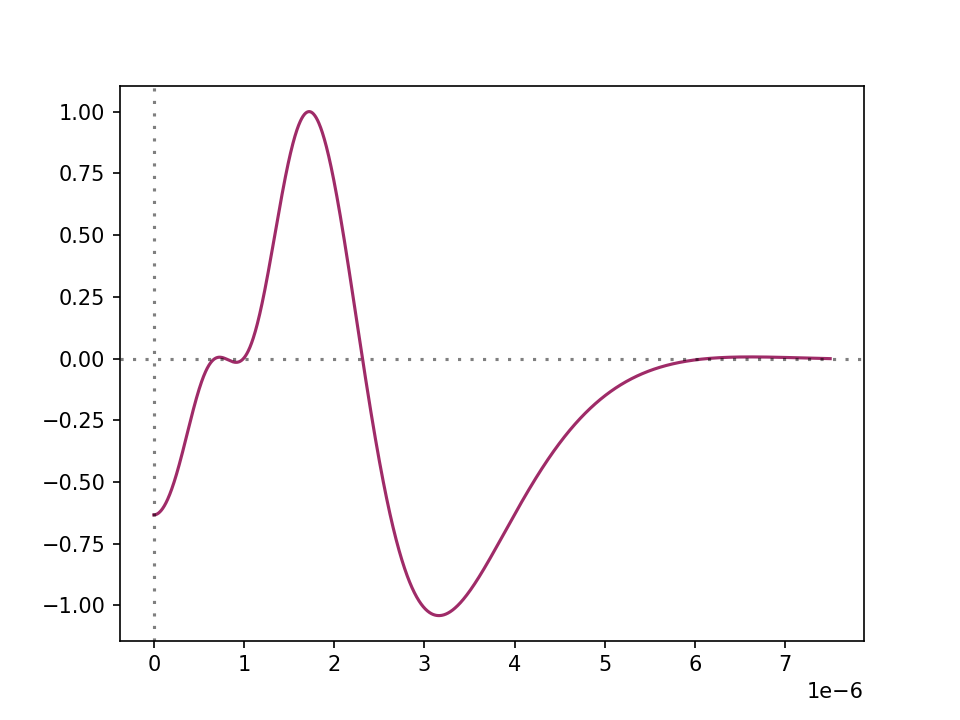

CPU times: user 149 ms, sys: 232 ms, total: 381 ms
Wall time: 137 ms


In [23]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)


z_plot_1 = np.array(list(sinx1p(zzz) + sinx1(zzz) + sinx1pp(zzz)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)


fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([1*w, 7*w])
# ax.set_ylim([-0.1,0.1])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

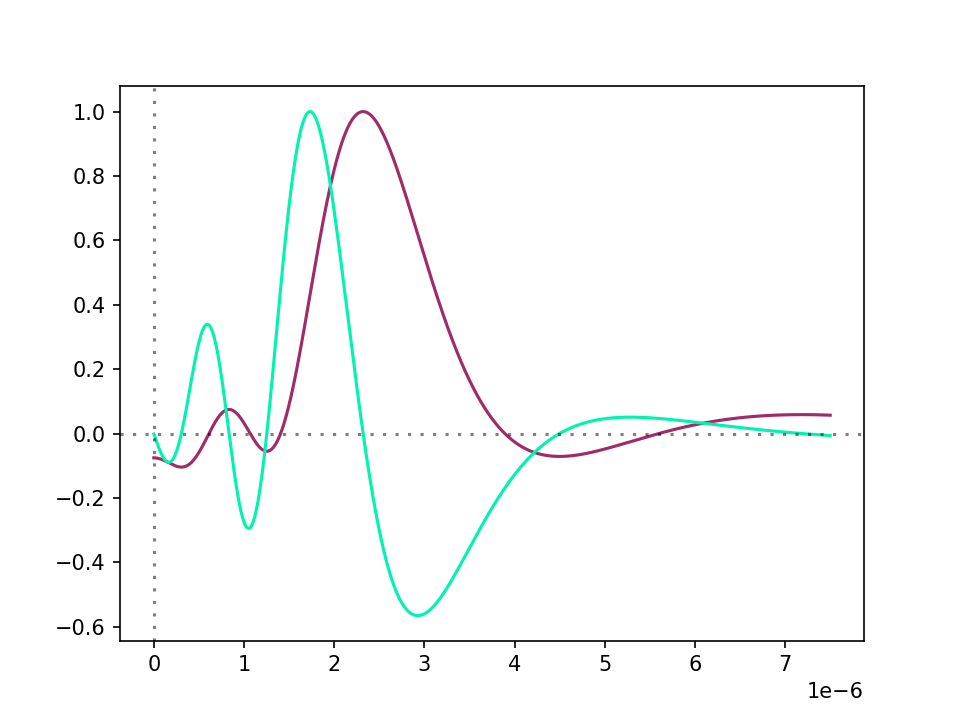

CPU times: user 173 ms, sys: 215 ms, total: 388 ms
Wall time: 164 ms


In [24]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)

z_plot_1 = np.array(list(sum_focus(zzz, points*15, w,r1,r2)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)

dz = np.gradient(z_plot_1, zzz)

dz = dz/np.max(dz)

ifft = np.fft.fft(z_plot_1)

fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")
ax.plot(zzz, dz, color="#02F3B0")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([0*w, .5*w])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

# 16 puntos

posición aproximada del foco:  1.6666666666666673e-06 ||| a maximo:  1.7677669529663689


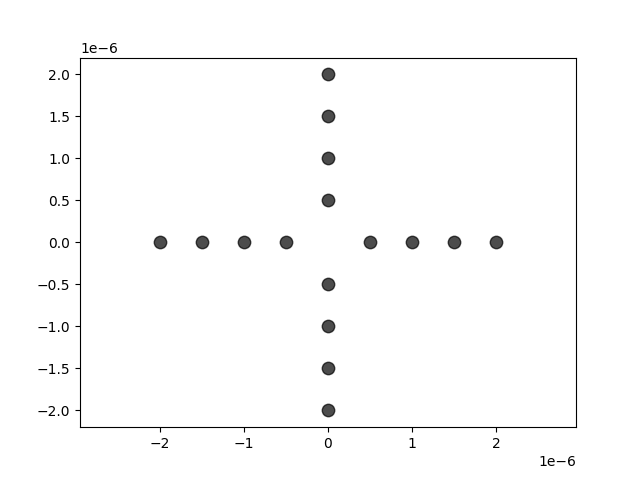

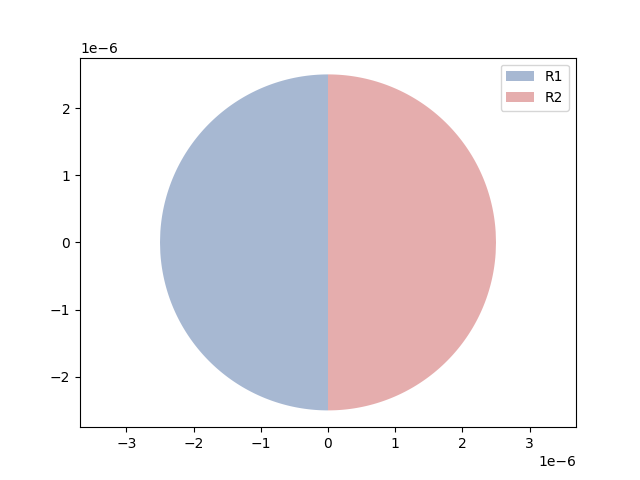

(None, 2.5000000000000006e-06)

In [25]:
w      = 500 * (10 ** -9)
r1     = 5*w
r2     = -5*w
a      = .1 * w
points = np.array([[a,0],[-a,0],[0,a],[0,-a],[2*a,0],[-2*a,0],[0,2*a],[0,-2*a],[3*a,0],[-3*a,0],[0,3*a],[0,-3*a],[4*a,0],[-4*a,0],[0,4*a],[0,-4*a]])

paraxial_aprox = (((0.5)*(1/r1) - (1/r2))) ** -1
print('posición aproximada del foco: ', paraxial_aprox, '||| a maximo: ',np.sqrt(25/8))

position_points(points*10)
len_draw(r1,r2,0), r1

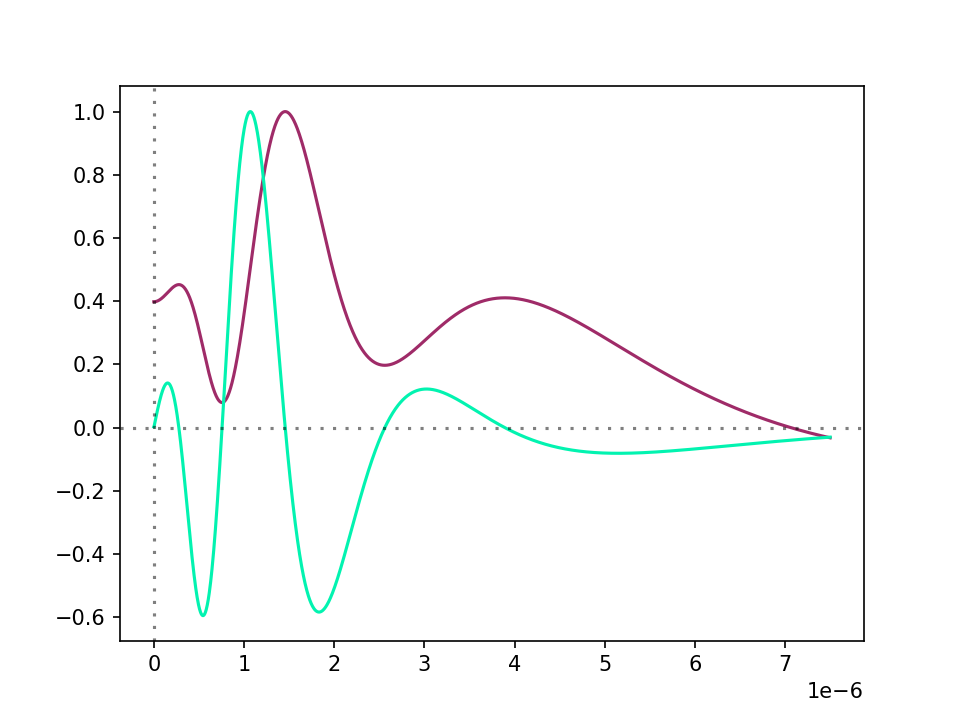

CPU times: user 191 ms, sys: 296 ms, total: 486 ms
Wall time: 160 ms


In [26]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)

z_plot_1 = np.array(list(sum_focus(zzz, points*10, w,r1,r2)), dtype=float)
# z_plot_2 = np.array(list(sum_focus(zzz, points*10, w,r1,r2)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)
# z_plot_2 = z_plot_2/np.max(z_plot_2)

dz = np.gradient(z_plot_1, zzz)

dz = dz/np.max(dz)

ifft = np.fft.fft(z_plot_1)

fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")
ax.plot(zzz, dz, color="#02F3B0")
# ax.plot(zzz, z_plot_2, color="#902B68")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([0*w, .5*w])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

In [27]:
# puntos individuales
points_2 = points*10

# posición de los puntos
x0 = points_2[0]
x1 = points_2[4]
x2 = points_2[8]
x3 = points_2[12]

# definición de k
k = ((2*np.pi)/w)

# indice de refracción
n = 1.5
x0, x1, x2, x3, points_2 

(array([5.e-07, 0.e+00]),
 array([1.e-06, 0.e+00]),
 array([1.5e-06, 0.0e+00]),
 array([2.e-06, 0.e+00]),
 array([[ 5.0e-07,  0.0e+00],
        [-5.0e-07,  0.0e+00],
        [ 0.0e+00,  5.0e-07],
        [ 0.0e+00, -5.0e-07],
        [ 1.0e-06,  0.0e+00],
        [-1.0e-06,  0.0e+00],
        [ 0.0e+00,  1.0e-06],
        [ 0.0e+00, -1.0e-06],
        [ 1.5e-06,  0.0e+00],
        [-1.5e-06,  0.0e+00],
        [ 0.0e+00,  1.5e-06],
        [ 0.0e+00, -1.5e-06],
        [ 2.0e-06,  0.0e+00],
        [-2.0e-06,  0.0e+00],
        [ 0.0e+00,  2.0e-06],
        [ 0.0e+00, -2.0e-06]]))

In [28]:
def zeroT(z):
    #argumentos
    arg1 = rho(x1, z, r1, r2, w) - rho(x0, z, r1, r2, w)
    arg2 = rho(x2, z, r1, r2, w) - rho(x0, z, r1, r2, w)
    arg3 = rho(x3, z, r1, r2, w) - rho(x0, z, r1, r2, w)
    arg4 = rho(x3, z, r1, r2, w) - rho(x1, z, r1, r2, w)
    arg5 = rho(x2, z, r1, r2, w) - rho(x1, z, r1, r2, w)
    arg6 = rho(x3, z, r1, r2, w) - rho(x2, z, r1, r2, w)
    
    #funcion sum sin
    sinx = np.sin(arg1) + np.sin(arg2) +np.sin(arg3) +np.sin(arg4) +np.sin(arg5) +np.sin(arg6) 
    
    return sinx

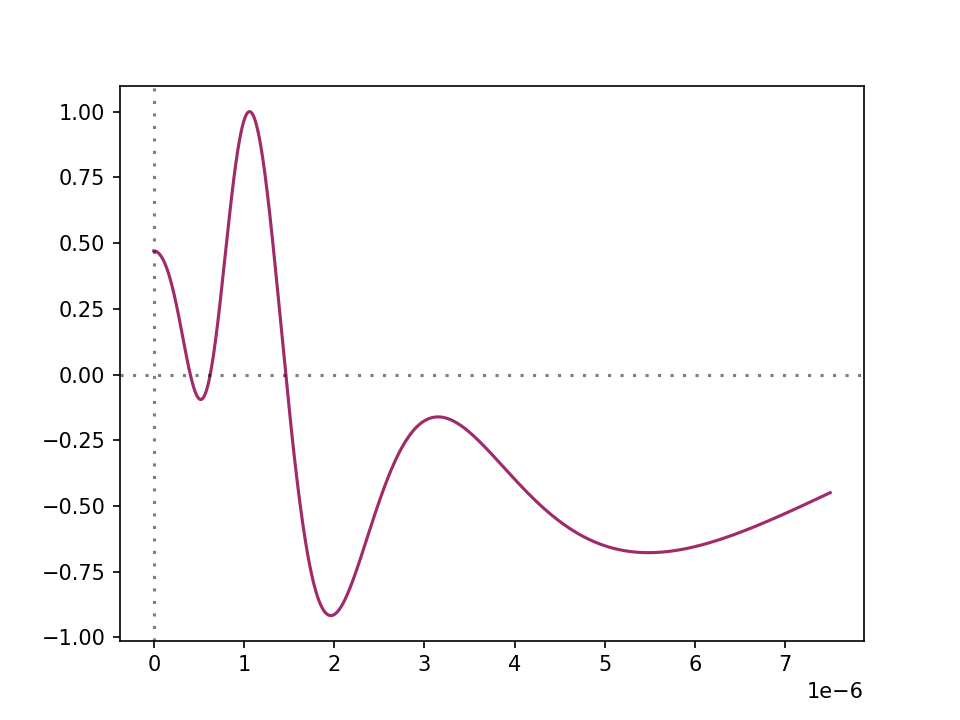

CPU times: user 142 ms, sys: 189 ms, total: 331 ms
Wall time: 125 ms


In [29]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)


z_plot_1 = np.array(list(zeroT(zzz)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)


fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([1*w, 7*w])
# ax.set_ylim([-0.1,0.1])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

/home/rafaelach/.local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


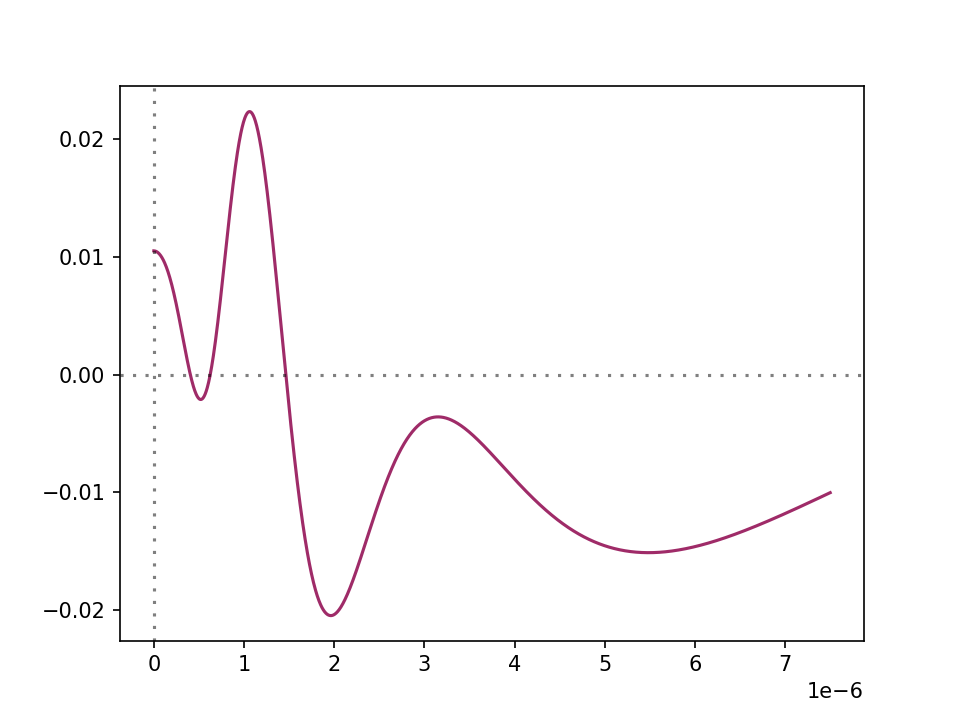

CPU times: user 159 ms, sys: 226 ms, total: 384 ms
Wall time: 136 ms


In [30]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)


z_plot_1 = np.array(list(zeroT(zzz)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)

ft = np.fft.fft(z_plot_1, norm= 'ortho')
# ft = (ft < 3) * ft
# ft[]
# ft = (ft > -2) * ft

z_new = np.fft.ifft(ft)


fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_new, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([0*w, .5*w])
# ax.set_ylim([-0.1,0.1])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

# Infinity

posición aproximada del foco:  1.2500000000000003e-06 ||| a maximo:  1.7677669529663689


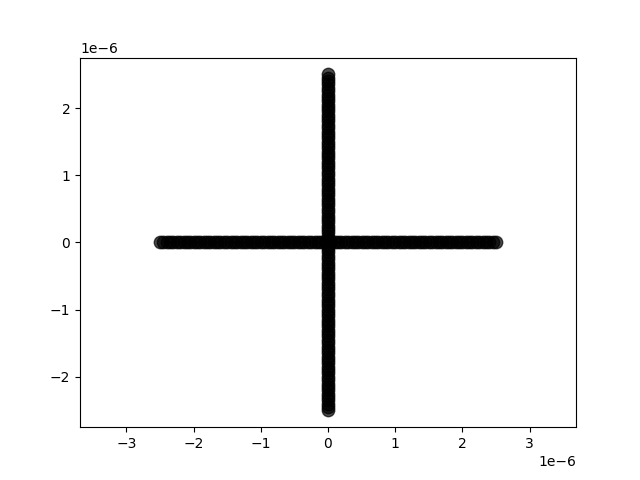

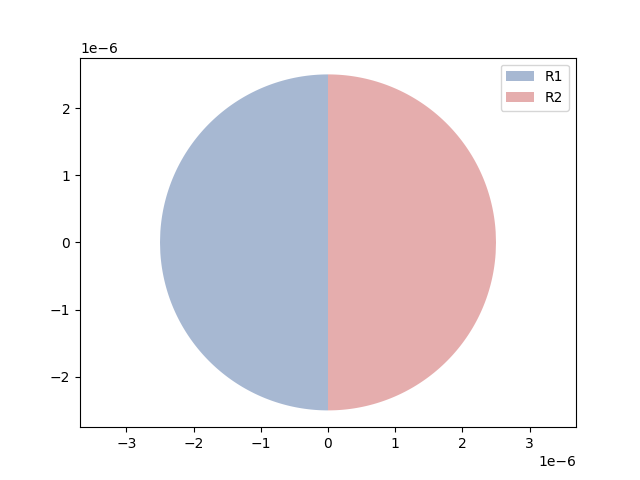

(None, 2.5000000000000006e-06)

In [31]:
w      = 500 * (10 ** -9)
r1     = 5*w
r2     = -5*w
a      = .1 * w
points = np.array([[a,0],[-a,0],[0,a],[0,-a],[2*a,0],[-2*a,0],[0,2*a],[0,-2*a],[3*a,0],[-3*a,0],[0,3*a],[0,-3*a],[4*a,0],[-4*a,0],[0,4*a],[0,-4*a],[5*a,0],[-5*a,0],[0,5*a],[0,-5*a],[6*a,0],[-6*a,0],[0,6*a],[0,-6*a],[7*a,0],[-7*a,0],[0,7*a],[0,-7*a],[8*a,0],[-8*a,0],[0,8*a],[0,-8*a],[9*a,0],[-9*a,0],[0,9*a],[0,-9*a],[10*a,0],[-10*a,0],[0,10*a],[0,-10*a],[11*a,0],[-11*a,0],[0,11*a],[0,-11*a],[12*a,0],[-12*a,0],[0,12*a],[0,-12*a],[13*a,0],[-13*a,0],[0,13*a],[0,-13*a],[14*a,0],[-14*a,0],[0,14*a],[0,-14*a],[15*a,0],[-15*a,0],[0,15*a],[0,-15*a],[16*a,0],[-16*a,0],[0,16*a],[0,-16*a],[17*a,0],[-17*a,0],[0,17*a],[0,-17*a],[18*a,0],[-18*a,0],[0,18*a],[0,-18*a],[19*a,0],[-19*a,0],[0,19*a],[0,-19*a],[20*a,0],[-20*a,0],[0,20*a],[0,-20*a],[21*a,0],[-21*a,0],[0,21*a],[0,-21*a],[22*a,0],[-22*a,0],[0,22*a],[0,-22*a],[23*a,0],[-23*a,0],[0,23*a],[0,-23*a],[24*a,0],[-24*a,0],[0,24*a],[0,-24*a],[25*a,0],[-25*a,0],[0,25*a],[0,-25*a],[26*a,0],[-26*a,0],[0,26*a],[0,-26*a],[27*a,0],[-27*a,0],[0,27*a],[0,-27*a],[28*a,0],[-28*a,0],[0,28*a],[0,-28*a],[29*a,0],[-29*a,0],[0,29*a],[0,-29*a],[30*a,0],[-30*a,0],[0,30*a],[0,-30*a],[31*a,0],[-31*a,0],[0,31*a],[0,-31*a],[32*a,0],[-32*a,0],[0,32*a],[0,-32*a],[33*a,0],[-33*a,0],[0,33*a],[0,-33*a],[34*a,0],[-34*a,0],[0,34*a],[0,-34*a],[35*a,0],[-35*a,0],[0,35*a],[0,-35*a],[36*a,0],[-36*a,0],[0,36*a],[0,-36*a],[37*a,0],[-37*a,0],[0,37*a],[0,-37*a],[38*a,0],[-38*a,0],[0,38*a],[0,-38*a],[39*a,0],[-39*a,0],[0,39*a],[0,-39*a],[40*a,0],[-40*a,0],[0,40*a],[0,-40*a],[41*a,0],[-41*a,0],[0,41*a],[0,-41*a],[42*a,0],[-42*a,0],[0,42*a],[0,-42*a],[43*a,0],[-43*a,0],[0,43*a],[0,-43*a],[44*a,0],[-44*a,0],[0,44*a],[0,-44*a],[45*a,0],[-45*a,0],[0,45*a],[0,-45*a],[46*a,0],[-46*a,0],[0,46*a],[0,-46*a],[47*a,0],[-47*a,0],[0,47*a],[0,-47*a],[48*a,0],[-48*a,0],[0,48*a],[0,-48*a],[49*a,0],[-49*a,0],[0,49*a],[0,-49*a],[50*a,0],[-50*a,0],[0,50*a],[0,-50*a]])
# points = np.array([[a,0],[-a,0],[0,a],[0,-a],[2*a,0],[-2*a,0],[0,2*a],[0,-2*a],[3*a,0],[-3*a,0],[0,3*a],[0,-3*a],[4*a,0],[-4*a,0],[0,4*a],[0,-4*a],[5*a,0],[-5*a,0],[0,5*a],[0,-5*a],[6*a,0],[-6*a,0],[0,6*a],[0,-6*a],[7*a,0],[-7*a,0],[0,7*a],[0,-7*a],[8*a,0],[-8*a,0],[0,8*a],[0,-8*a],[9*a,0],[-9*a,0],[0,9*a],[0,-9*a],[10*a,0],[-10*a,0],[0,10*a],[0,-10*a],[11*a,0],[-11*a,0],[0,11*a],[0,-11*a],[12*a,0],[-12*a,0],[0,12*a],[0,-12*a],[13*a,0],[-13*a,0],[0,13*a],[0,-13*a],[14*a,0],[-14*a,0],[0,14*a],[0,-14*a],[15*a,0],[-15*a,0],[0,15*a],[0,-15*a],[16*a,0],[-16*a,0],[0,16*a],[0,-16*a],[17*a,0],[-17*a,0],[0,17*a],[0,-17*a],[18*a,0],[-18*a,0],[0,18*a],[0,-18*a],[19*a,0],[-19*a,0],[0,19*a],[0,-19*a],[20*a,0],[-20*a,0],[0,20*a],[0,-20*a]])


paraxial_aprox = (((1/r1) - (1/r2))) ** -1
print('posición aproximada del foco: ', paraxial_aprox, '||| a maximo: ',np.sqrt(25/8))

position_points(points*1)
len_draw(r1,r2,0), r1

<timed exec>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


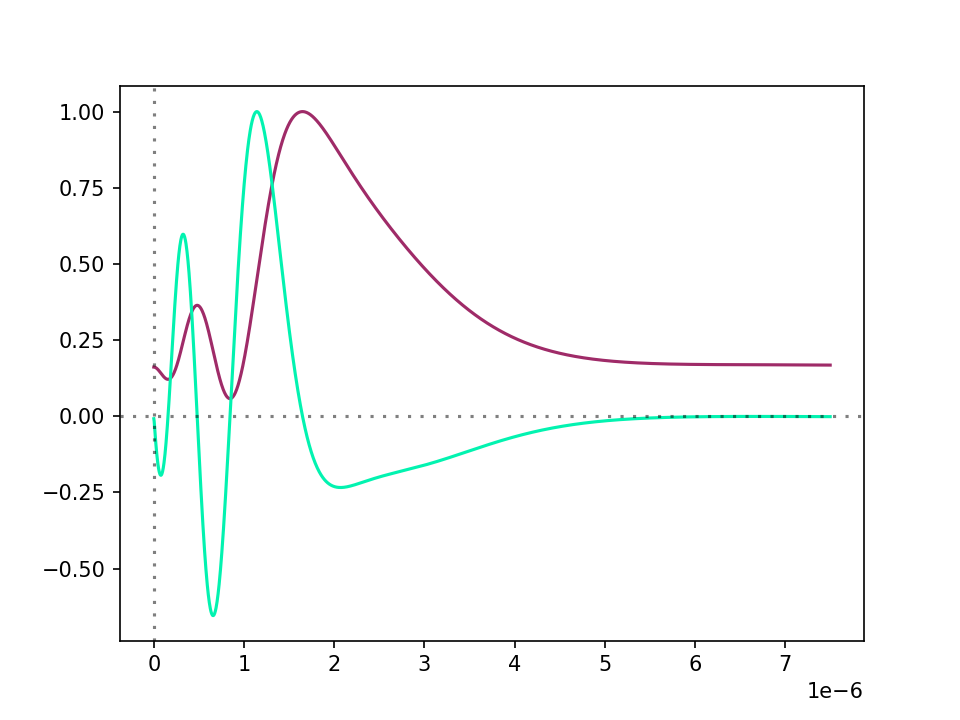

CPU times: user 5.07 s, sys: 209 ms, total: 5.28 s
Wall time: 5.04 s


In [32]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)

z_plot_1 = np.array(list(sum_focus(zzz, points*.9, w,r1,r2)), dtype=float)
# z_plot_2 = np.array(list(sum_focus(zzz, points*10, w,r1,r2)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)
# z_plot_2 = z_plot_2/np.max(z_plot_2)

dz = np.gradient(z_plot_1, zzz)

dz = dz/np.max(dz)

fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")
ax.plot(zzz, dz, color="#02F3B0")
# ax.plot(zzz, z_plot_2, color="#902B68")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([0*w, .5*w])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

In [33]:
points_aprox = points*0.9

In [34]:
def aprox_taylor(z):
    empty_list = []
    n = 1
    count = 0
    suma = 0
    suma_prox = 0
    
    for i in range(0,len(points_aprox), 4):
        rho_aux = rho(points_aprox[i], zzz, r1, r2, w)
        empty_list.append(rho_aux)
    
    empty_list = np.array(empty_list)
    
    while n < len(empty_list):
        for i in range(n,len(empty_list)):
            suma = suma + np.sin(empty_list[i]-empty_list[n-1])
            suma_prox = suma_prox + empty_list[i]-empty_list[n-1]
#             print(np.sin(empty_list[i]-empty_list[n-1]))
            count = count + 1
#             print(count)
            
        n = n +1
#     aprox = p1
    return suma, suma_prox

In [35]:
aprox_taylor(zzz)

(array([  73.82455618,   73.82451648,   73.82512975, ..., -237.783267  ,
        -237.76716026, -237.75112005]),
 array([ 4897.34712702,  4897.09287722,  4896.33247146, ...,
        -5107.50209044, -5108.35763719, -5109.21237238]))

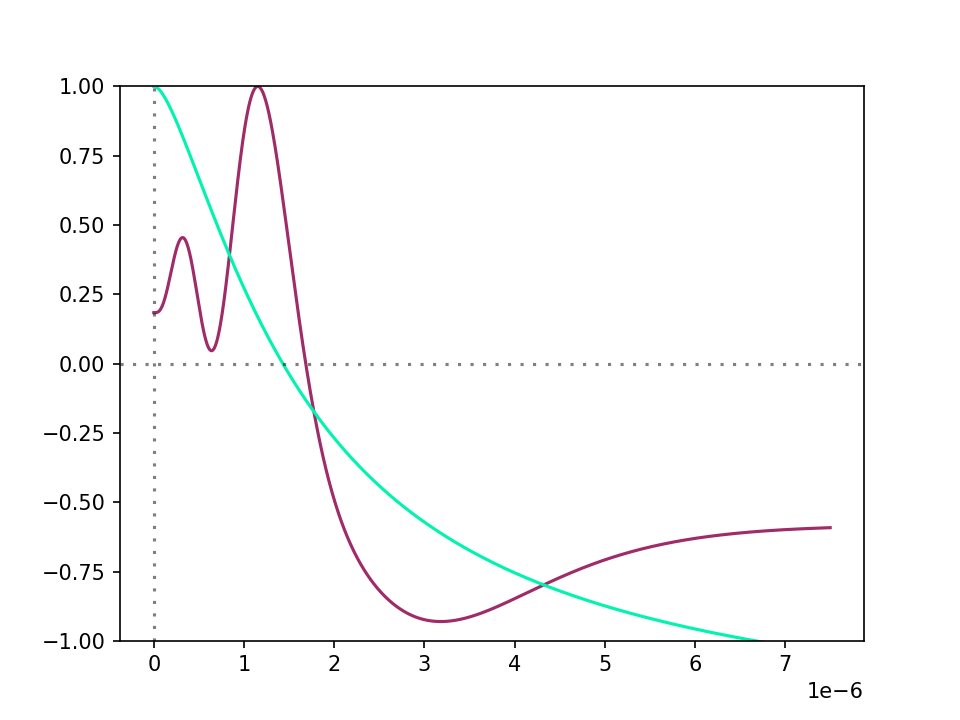

CPU times: user 153 ms, sys: 125 ms, total: 278 ms
Wall time: 142 ms


In [36]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)


z_plot_1 = np.array(list(aprox_taylor(zzz)[0]), dtype=float)
z_plot_2 = np.array(list(aprox_taylor(zzz)[1]), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)
z_plot_2 = z_plot_2/np.max(z_plot_2)


fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
ax.plot(zzz, z_plot_2, color="#02F3B0")
# ax.plot(zzz, ifft, color="#9F2B68")

ax.axhline(y=0, color='k', dashes=(1,3), alpha=.5)
ax.axvline(x=0, color='k', dashes=(1,3), alpha=.5)
# ax.set_xlim([1*w, 7*w])
ax.set_ylim([-1,1])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

In [37]:
z_random = 2*w
point_random1 = 1*w
point_random2 = 1.1*w

n1 = z_random + 0.5*(point_random1**2)*(z_random ** (-1/2)) + 0.5*(z_random ** (3/2)) - 0.5*np.sqrt(z_random)
n2 = z_random + 0.5*(point_random2**2)*(z_random ** (-1/2)) + 0.5*(z_random ** (3/2)) - 0.5*np.sqrt(z_random)

(n2) - (n1)

2.6250000003530394e-11